Set up of the working environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/optical-rl-gym-Modif
!ls #To check that we are inside the optical-rl-gym folder

/content/drive/My Drive/optical-rl-gym-Modif
docs		optical_rl_gym.egg-info		     setup.cfg	tmp
examples	pyproject.toml			     setup.py
LICENSE		README.md			     tb
optical_rl_gym	Results_for_comparison_Agents.ipynb  tests


In [ ]:
!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/My%20Drive/optical-rl-gym-Modif
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Running setup.py develop for optical-rl-gym


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt install swig cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines3[extra] box2d box2d-kengz
!pip install tensorflow==1.15

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopenmpi-dev is already the newest version (2.1.1-8).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2.2).
zlib1g-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 21 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
import os
import gym
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import logging
logging.getLogger('tensorflow').setLevel(logging.FATAL)
from IPython.display import clear_output

import stable_baselines3
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy

In [ ]:
from stable_baselines3 import DQN
from stable_baselines3 import PPO
from stable_baselines3 import A2C
from stable_baselines3.common.monitor import Monitor

In [ ]:
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:
            # Retrieve training reward
            x, y = ts2xy(load_results(self.log_dir), 'timesteps')
            if len(x) > 0:
                 # Mean training reward over the last 100 episodes
                mean_reward = np.mean(y[-100:])
                if self.verbose > 0:
                    print("Num timesteps: {} - ".format(self.num_timesteps),end="")
                    print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))
                  # New best model, you could save the agent here
                if mean_reward > self.best_mean_reward:
                    self.best_mean_reward = mean_reward
                    # Example for saving best model
                    if self.verbose > 0:
                        print("Saving new best model to {}".format(self.save_path))
                        self.model.save(self.save_path)
                if self.verbose > 0:
                    clear_output(wait=True)

        return True

# Creating the environment for a NSFNET Topology

In [ ]:
import h5py
import networkx as nx
import matplotlib as plt

nxG = nx.Graph()

import sys
sys.path.insert(0, "/content/drive/MyDrive/optical-rl-gym-Modif")

#import optical_rl_gym

# loading the topology binary file containing the graph and the k-shortest paths
# if you want to generate your own binary topology file, check examples/create_topology_rmsa.py
topology_name = 'nsfnet_chen_eon'
k_paths = 10


with open(f"/content/drive/MyDrive/optical-rl-gym-Modif/examples/topologies/{topology_name}_{k_paths}-paths.h5", 'rb') as f:
  topology = pickle.load(f)

#node probabilities from https://github.com/xiaoliangchenUCD/DeepRMSA/blob/6708e9a023df1ec05bfdc77804b6829e33cacfe4/Deep_RMSA_A3C.py#L77
node_request_probabilities = np.array([0.01801802, 0.04004004, 0.05305305, 0.01901902, 0.04504505,
       0.02402402, 0.06706707, 0.08908909, 0.13813814, 0.12212212,
       0.07607608, 0.12012012, 0.01901902, 0.16916917])


Plotting the topology NSFNET

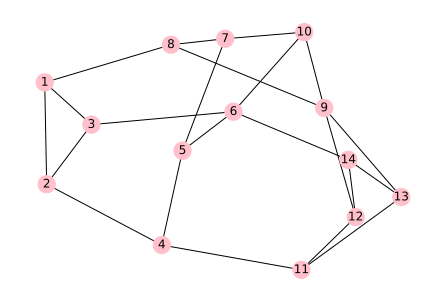

In [ ]:
nxG.add_edges_from(topology.edges())
nxG.add_nodes_from(topology.nodes())
pos = nx.kamada_kawai_layout(nxG)
nx.draw(nxG, edge_color = 'black', node_color = 'pink', labels ={node: node for node in nxG.nodes()})

Eurocore Topology

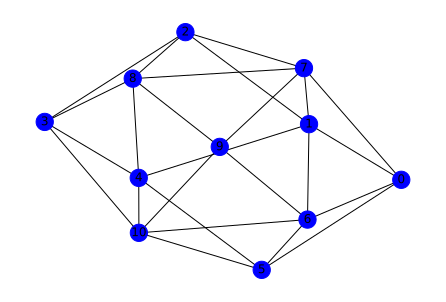

In [ ]:
import h5py
import networkx as nx
import matplotlib as plt

nxG2 = nx.Graph()
import sys
sys.path.insert(0, "/content/drive/MyDrive/optical-rl-gym-Modif")

topology_name_2 = 'eurocore_eon'
k_paths = 10

with open(f'/content/drive/MyDrive/optical-rl-gym-Modif/examples/topologies/{topology_name_2}_{k_paths}-paths.h5', 'rb') as f2:
    topology2 = pickle.load(f2)

node_request_probabilities_eurocore = np.array([1/11, 1/11, 1/11, 1/11, 1/11,
       1/11, 1/11,1/11, 1/11, 1/11,
       1/11])

nxG2.add_edges_from(topology2.edges())
nxG2.add_nodes_from(topology2.nodes())
pos2 = nx.kamada_kawai_layout(nxG2)
nx.draw(nxG2, edge_color = 'black', node_color = 'blue', labels ={node: node for node in nxG2.nodes()})

## Creating a new topology: 17 nodes, 28 edges

0 1 ['1', '2']
1 2 ['1', '3', '2']
2 3 ['1', '8', '3', '2']
3 4 ['1', '12', '4', '3', '2']
4 4 ['1', '13', '16', '14', '2']
5 1 ['1', '3']
6 2 ['1', '2', '3']
7 2 ['1', '8', '3']
8 3 ['1', '12', '4', '3']
9 4 ['1', '13', '17', '4', '3']
10 2 ['1', '3', '4']
11 2 ['1', '12', '4']
12 3 ['1', '2', '3', '4']
13 3 ['1', '8', '3', '4']
14 3 ['1', '13', '17', '4']
15 1 ['1', '5']
16 2 ['1', '13', '5']
17 4 ['1', '12', '7', '6', '5']
18 4 ['1', '12', '11', '6', '5']
19 5 ['1', '2', '14', '16', '13', '5']
20 2 ['1', '5', '6']
21 3 ['1', '13', '5', '6']
22 3 ['1', '12', '7', '6']
23 3 ['1', '12', '11', '6']
24 4 ['1', '8', '9', '10', '6']
25 2 ['1', '12', '7']
26 3 ['1', '5', '6', '7']
27 4 ['1', '12', '11', '6', '7']
28 4 ['1', '3', '4', '12', '7']
29 4 ['1', '5', '6', '10', '7']
30 1 ['1', '8']
31 2 ['1', '3', '8']
32 3 ['1', '2', '3', '8']
33 4 ['1', '12', '4', '3', '8']
34 5 ['1', '5', '6', '10', '9', '8']
35 2 ['1', '8', '9']
36 3 ['1', '3', '8', '9']
37 4 ['1', '2', '3', '8', '9']
38 4 ['1

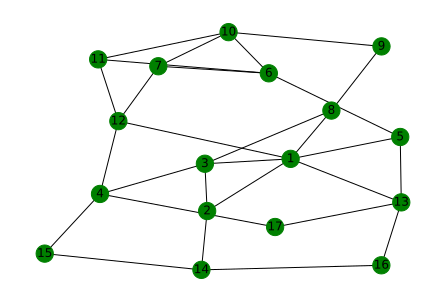

In [ ]:
import optical_rl_gym
from optical_rl_gym.utils import Path

from itertools import islice
import numpy as np
import networkx as nx
import math
import pickle
from xml.dom.minidom import parse
import xml.dom.minidom

import matplotlib.pyplot as plt

from examples.graph_utils import read_sndlib_topology, read_txt_file, get_k_shortest_paths, get_path_weight
from examples.create_topology import get_topology



# Importing and plotting the topology
nxG3 = nx.Graph()
import sys
sys.path.insert(0, "/content/drive/MyDrive/optical-rl-gym-Modif")

topology_name_3 = 'new_topology_eon'
k_paths = 5

with open(f'/content/drive/MyDrive/optical-rl-gym-Modif/examples/topologies/{topology_name_3}_{k_paths}-paths.h5', 'rb') as f3:
    topology3 = pickle.load(f3)

node_request_probabilities_new_topology = np.array([1/17, 1/17, 1/17, 1/17, 1/17,
       1/17, 1/17, 1/17, 1/17, 1/17, 1/17, 1/17,
       1/17, 1/17, 1/17, 1/17, 1/17])

nxG3.add_edges_from(topology3.edges())
nxG3.add_nodes_from(topology3.nodes())
pos3 = nx.kamada_kawai_layout(nxG3)
nx.draw(nxG3, edge_color = 'black', node_color = 'green', labels ={node: node for node in nxG3.nodes()})


### Training the Agents on the NSFNET topology

Training A2C agent

In [ ]:
from stable_baselines3.a2c.policies import MlpPolicy

for ht in [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:

  # mean_service_holding_time varying between 7.5 and 60,
  env_args = dict(topology=topology, seed=10, 
                allow_rejection=False, # the agent cannot proactively reject a request
                j=1, # consider only the first suitable spectrum block for the spectrum assignment
                mean_service_holding_time=ht, # value is not set as in the paper to achieve comparable reward values
                episode_length=50, node_request_probabilities=node_request_probabilities, num_spectrum_resources = 358)
  
  # Create log dir
  log_dir = "/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-{}-nsfnet/".format(ht)
  os.makedirs(log_dir, exist_ok=True)
  callback = SaveOnBestTrainingRewardCallback(check_freq=100, log_dir=log_dir)

  env = gym.make('DeepRMSADPP-v0', **env_args)

  # logs will be saved in log_dir/monitor.csv
  # in this case, on top of the usual monitored things, we also monitor service and bit rate blocking probabilities
  env = Monitor(env, log_dir + 'training', info_keywords=('episode_service_blocking_rate', 'bit_rate_blocking_rate', 'failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))

  policy_args = dict(net_arch=5*[128])#, act_fun=tf.nn.elu) # the neural network has four layers with 150 neurons each

  agent = A2C(MlpPolicy, env, verbose=0, tensorboard_log="/content/drive/MyDrive/optical-rl-gym-Modif/tb/A2C-50-DeepRMSA-v0/", policy_kwargs=policy_args, gamma=.95 , learning_rate=10e-5)

  a = agent.learn(total_timesteps=50000, callback=callback)

  from stable_baselines3.common import results_plotter

  results_plotter.plot_results([log_dir], 1e10, results_plotter.X_TIMESTEPS, "DeepRMSA A2C for {}*10 Erlangs".format(ht))

  from stable_baselines3.common.evaluation import evaluate_policy
  testing_env = gym.make('DeepRMSADPP-v0', **env_args)

  # Logs will be saved in log_dir/monitor.csv
  testing_env = Monitor(testing_env, log_dir + 'testing', info_keywords=('episode_service_blocking_rate', 'bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))

  # Evaluate the trained agent
  mean_reward, std_reward = evaluate_policy(a, testing_env, n_eval_episodes=500)

  print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")


KeyboardInterrupt: ignored

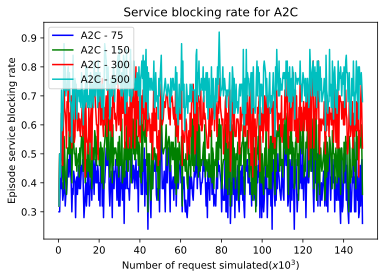

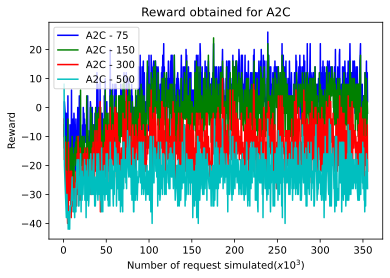

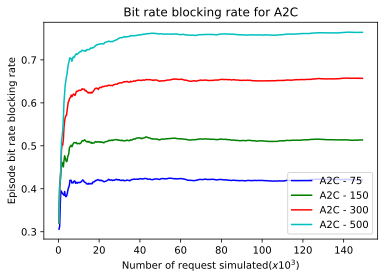

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Testing phase
df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-7.5-nsfnet/testing.monitor.csv',header=1)
df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-15-nsfnet/testing.monitor.csv',header=1)
df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-30-nsfnet/testing.monitor.csv',header=1)
df_4=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-50-nsfnet/testing.monitor.csv',header=1)

df_5=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-10-nsfnet/training.monitor.csv',header=1)
df_6=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-15-nsfnet/training.monitor.csv',header=1)
df_7=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-30-nsfnet/training.monitor.csv',header=1)
df_8=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-50-nsfnet/training.monitor.csv',header=1)
images_dir = '/content/drive/MyDrive/optical-rl-gym-Modif/tmp/Results/'

x = df.t
y = df.episode_service_blocking_rate
y_2 = df_2.episode_service_blocking_rate
y_3 = df_3.episode_service_blocking_rate
y_4 = df_4.episode_service_blocking_rate

x2 = df_5.t
y_5 = df_5.r
y_6 = df_6.r
y_7 = df_7.r
y_8 = df_8.r

plt.plot(x, y, 'b')
plt.plot(x, y_2, 'g')
plt.plot(x, y_3, 'r')
plt.plot(x, y_4, 'c')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode service blocking rate") 
plt.title("Service blocking rate for A2C") 
#plt.axhline(y=0.05, color='tab:red', linestyle='-')
plt.gca().legend(('A2C - 75', 'A2C - 150', 'A2C - 300', 'A2C - 500'))
plt.savefig(f"{images_dir}a2cSBR.png")
plt.show()



plt.plot(x2, y_5, 'b')
plt.plot(x2, y_6, 'g')
plt.plot(x2, y_7, 'r')
plt.plot(x2, y_8, 'c')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Reward") 
plt.title("Reward obtained for A2C") 
#plt.axhline(y=0.05, color='tab:red', linestyle='-')
plt.gca().legend(('A2C - 75', 'A2C - 150', 'A2C - 300', 'A2C - 500'))
plt.savefig(f"{images_dir}a2cR.png")
plt.show()


z = df.bit_rate_blocking_rate
z_2 = df_2.bit_rate_blocking_rate
z_3 = df_3.bit_rate_blocking_rate
z_4 = df_4.bit_rate_blocking_rate

plt.plot(x, z, 'b')
plt.plot(x, z_2, 'g')
plt.plot(x, z_3, 'r')
plt.plot(x, z_4, 'c')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode bit rate blocking rate") 
plt.title("Bit rate blocking rate for A2C") 
#plt.axhline(y=0.05, color='tab:red', linestyle='-')
plt.gca().legend(('A2C - 75', 'A2C - 150', 'A2C - 300', 'A2C - 500'))
plt.savefig(f"{images_dir}a2cBBR.png")
plt.show()

Training the DQN Agent

KeyboardInterrupt: ignored

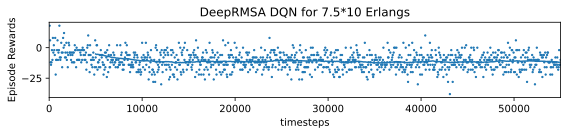

In [ ]:
from stable_baselines3.dqn import MlpPolicy

for ht in [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
  env_args = dict(topology=topology, seed=10, 
                  allow_rejection=False, # the agent cannot proactively reject a request
                  j=1, # consider only the first suitable spectrum block for the spectrum assignment
                  mean_service_holding_time=ht, # value is not set as in the paper to achieve comparable reward values
                  episode_length=50, node_request_probabilities=node_request_probabilities, num_spectrum_resources = 358)

  # Create log dir
  log_dir = "/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-{}-nsfnet/".format(ht)
  os.makedirs(log_dir, exist_ok=True)
  callback = SaveOnBestTrainingRewardCallback(check_freq=50, log_dir=log_dir)

  env = gym.make('DeepRMSADPP-v0', **env_args)

  # logs will be saved in log_dir/monitor.csv
  # in this case, on top of the usual monitored things, we also monitor service and bit rate blocking probabilities

  env = Monitor(env, log_dir + 'training', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))
  
  #kwargs = {'double_q': True, 'prioritized_replay': True, 'policy_kwargs': dict(dueling=True)} # set of parameters for testing
  #policy_kwargs = {'layers': [128] * 4, 'dueling': False}
  policy_kwargs = dict(net_arch=4*[128, 128, 128, 128])
  model = DQN(MlpPolicy, env, verbose=0, tensorboard_log="/content/drive/MyDrive/optical-rl-gym-Modif/tb/DQN-1k-DeepRMSA-v0/", gamma=.95, policy_kwargs=policy_kwargs,
           learning_rate=10e-5)

  training_m = model.learn(total_timesteps=50000, callback=callback)

  from stable_baselines3.common import results_plotter

  results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "DeepRMSA DQN for {}*10 Erlangs".format(ht))

  from stable_baselines3.common.evaluation import evaluate_policy
  testing_env = gym.make('DeepRMSADPP-v0', **env_args)

  # Logs will be saved in log_dir/monitor.csv
  testing_env = Monitor(testing_env, log_dir + 'testing', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))

  # Evaluate the trained agent
  mean_reward, std_reward = evaluate_policy(model, testing_env, n_eval_episodes=100)

  print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")


Plotting the DQN Agent's results

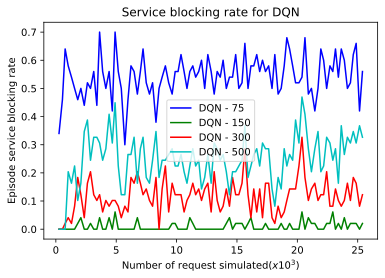

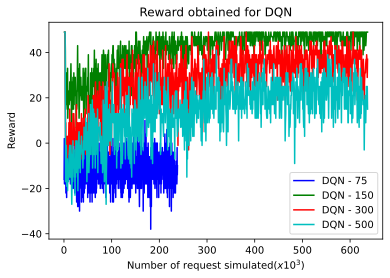

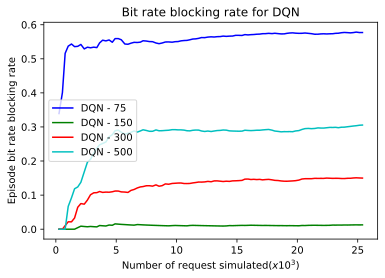

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-7.5-nsfnet/testing.monitor.csv',header=1)
df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-15-nsfnet/testing.monitor.csv',header=1)
df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-30-nsfnet/testing.monitor.csv',header=1)
df_4=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-50-nsfnet/testing.monitor.csv',header=1)

df_5=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-7.5-nsfnet/training.monitor.csv',header=1)
df_6=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-15-nsfnet/training.monitor.csv',header=1)
df_7=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-30-nsfnet/training.monitor.csv',header=1)
df_8=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-50-nsfnet/training.monitor.csv',header=1)
images_dir = '/content/drive/MyDrive/optical-rl-gym-Modif/tmp/Results/'

x = df.t
y = df.episode_service_blocking_rate
y_2 = df_2.episode_service_blocking_rate
y_3 = df_3.episode_service_blocking_rate
y_4 = df_4.episode_service_blocking_rate

x2 = df_5.t
y_5 = df_5.r
x3 = df_6.t
y_6 = df_6.r
y_7 = df_7.r
y_8 = df_8.r

plt.plot(x, y, 'b')
plt.plot(x, y_2, 'g')
plt.plot(x, y_3, 'r')
plt.plot(x, y_4, 'c')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode service blocking rate") 
plt.title("Service blocking rate for DQN") 
#plt.axhline(y=0.05, color='tab:red', linestyle='-')
plt.gca().legend(('DQN - 75', 'DQN - 150', 'DQN - 300', 'DQN - 500'))
plt.savefig(f"{images_dir}dqnSBR.png")
plt.show()



plt.plot(x2, y_5, 'b')
plt.plot(x3, y_6, 'g')
plt.plot(x3, y_7, 'r')
plt.plot(x3, y_8, 'c')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Reward") 
plt.title("Reward obtained for DQN") 
#plt.axhline(y=0.05, color='tab:red', linestyle='-')
plt.gca().legend(('DQN - 75', 'DQN - 150', 'DQN - 300', 'DQN - 500'))
plt.savefig(f"{images_dir}dqnR.png")
plt.show()


z = df.bit_rate_blocking_rate
z_2 = df_2.bit_rate_blocking_rate
z_3 = df_3.bit_rate_blocking_rate
z_4 = df_4.bit_rate_blocking_rate

plt.plot(x, z, 'b')
plt.plot(x, z_2, 'g')
plt.plot(x, z_3, 'r')
plt.plot(x, z_4, 'c')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode bit rate blocking rate") 
plt.title("Bit rate blocking rate for DQN") 
#plt.axhline(y=0.05, color='tab:red', linestyle='-')
plt.gca().legend(('DQN - 75', 'DQN - 150', 'DQN - 300', 'DQN - 500'))
plt.savefig(f"{images_dir}dqnBBR.png")
plt.show()



Training PPO Agent

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean_reward:-24.48 +/- 8.12


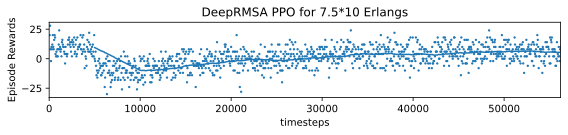

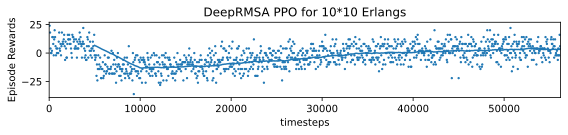

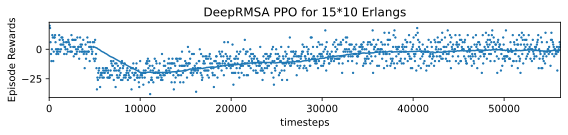

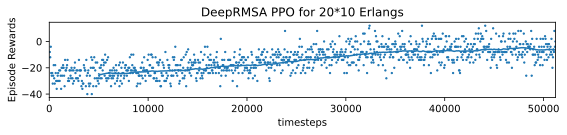

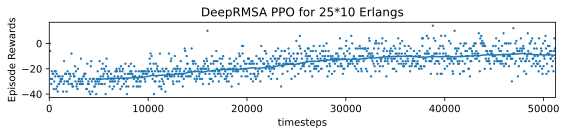

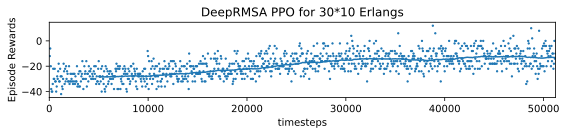

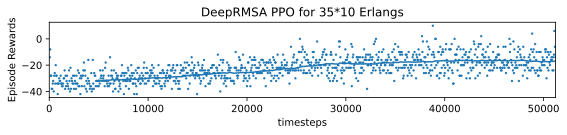

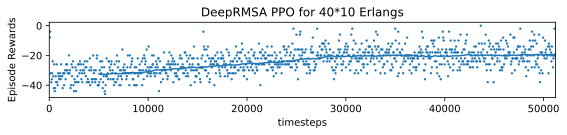

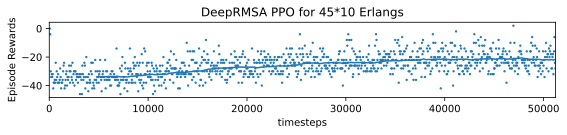

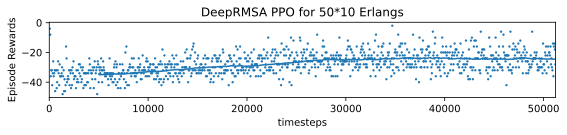

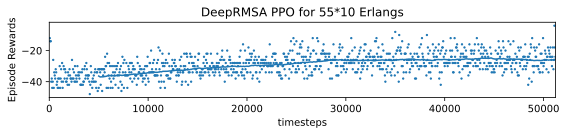

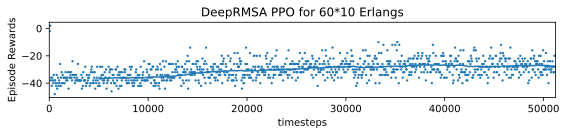

In [ ]:
from stable_baselines3.ppo.policies import MlpPolicy

for ht in [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
  
  env_args = dict(topology=topology, seed=10, 
                  allow_rejection=False, # the agent cannot proactively reject a request
                  j=1, # consider only the first suitable spectrum block for the spectrum assignment
                  mean_service_holding_time=ht, # value is not set as in the paper to achieve comparable reward values
                  episode_length=50, node_request_probabilities=node_request_probabilities, num_spectrum_resources = 358)
  
  # Create log dir
  log_dir = "/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo-25/deeprmsa-ppo-{}-nsfnet/".format(ht)
  os.makedirs(log_dir, exist_ok=True)
  callback = SaveOnBestTrainingRewardCallback(check_freq=100, log_dir=log_dir)

  env = gym.make('DeepRMSADPP-v0', **env_args)

  # logs will be saved in log_dir/monitor.csv
  # in this case, on top of the usual monitored things, we also monitor service and bit rate blocking probabilities

  env = Monitor(env, log_dir + 'training', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))
  
  policy_args = dict(net_arch=5*[128])#, # the neural network has five layers with 128 neurons each
                   #act_fun=tf.nn.elu) # we use the elu activation function

  agent = PPO(MlpPolicy, env, verbose=0, tensorboard_log="/content/drive/MyDrive/optical-rl-gym-Modif/tb/PPO-25-DeepRMSA-v0/", policy_kwargs=policy_args, gamma=.95, learning_rate=10e-5)

  modelppo = agent.learn(total_timesteps=50000, callback=callback)

  from stable_baselines3.common import results_plotter

  results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "DeepRMSA PPO for {}*10 Erlangs".format(ht))

  from stable_baselines3.common.evaluation import evaluate_policy
  testing_env = gym.make('DeepRMSADPP-v0', **env_args)

  # Logs will be saved in log_dir/monitor.csv
  testing_env = Monitor(testing_env, log_dir + 'testing', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))

  # Evaluate the trained agent
  mean_reward, std_reward = evaluate_policy(modelppo, testing_env, n_eval_episodes=100)

  print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

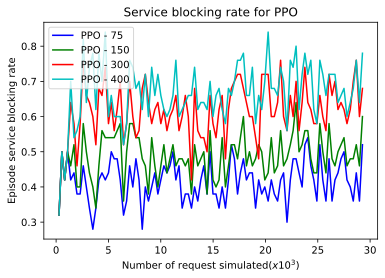

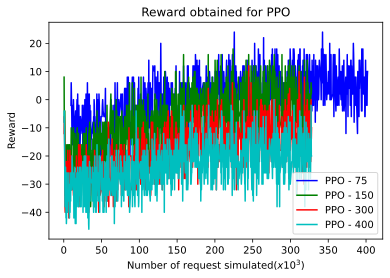

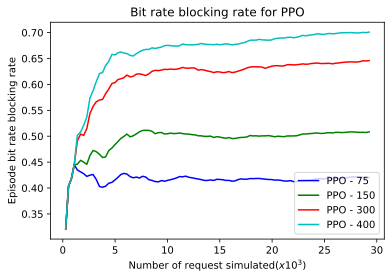

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo-25/deeprmsa-ppo-7.5-nsfnet/testing.monitor.csv',header=1)
df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo-25/deeprmsa-ppo-15-nsfnet/testing.monitor.csv',header=1)
df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo-25/deeprmsa-ppo-30-nsfnet/testing.monitor.csv',header=1)
df_4=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo-25/deeprmsa-ppo-40-nsfnet/testing.monitor.csv',header=1)

df_5=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo-25/deeprmsa-ppo-7.5-nsfnet/training.monitor.csv',header=1)
df_6=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo-25/deeprmsa-ppo-15-nsfnet/training.monitor.csv',header=1)
df_7=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo-25/deeprmsa-ppo-30-nsfnet/training.monitor.csv',header=1)
df_8=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo-25/deeprmsa-ppo-40-nsfnet/training.monitor.csv',header=1)


images_dir = '/content/drive/MyDrive/optical-rl-gym-Modif/tmp/Results/'

x = df.t
y = df.episode_service_blocking_rate
y_2 = df_2.episode_service_blocking_rate
y_3 = df_3.episode_service_blocking_rate
y_4 = df_4.episode_service_blocking_rate

x2 = df_5.t
y_5 = df_5.r
x3 = df_6.t
y_6 = df_6.r
y_7 = df_7.r
y_8 = df_8.r

plt.plot(x, y, 'b')
plt.plot(x, y_2, 'g')
plt.plot(x, y_3, 'r')
plt.plot(x, y_4, 'c')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode service blocking rate") 
plt.title("Service blocking rate for PPO") 
plt.gca().legend(('PPO - 75', 'PPO - 150', 'PPO - 300', 'PPO - 400'))
plt.savefig(f"{images_dir}ppoSBR.png")
plt.show()



plt.plot(x2, y_5, 'b')
plt.plot(x3, y_6, 'g')
plt.plot(x3, y_7, 'r')
plt.plot(x3, y_8, 'c')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Reward") 
plt.title("Reward obtained for PPO") 
plt.gca().legend(('PPO - 75', 'PPO - 150', 'PPO - 300', 'PPO - 400'))
plt.savefig(f"{images_dir}ppoR.png")
plt.show()


z = df.bit_rate_blocking_rate
z_2 = df_2.bit_rate_blocking_rate
z_3 = df_3.bit_rate_blocking_rate
z_4 = df_4.bit_rate_blocking_rate

plt.plot(x, z, 'b')
plt.plot(x, z_2, 'g')
plt.plot(x, z_3, 'r')
plt.plot(x, z_4, 'c')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode bit rate blocking rate") 
plt.title("Bit rate blocking rate for PPO") 
plt.gca().legend(('PPO - 75', 'PPO - 150', 'PPO - 300', 'PPO - 400'))
plt.savefig(f"{images_dir}ppoBBR.png")
plt.show()

## Training the agent on 60 Erlangs but testing it on 7.5 Erlangs of blocking time

In [ ]:
from stable_baselines3.dqn import MlpPolicy

env_args = dict(topology=topology, seed=10, 
                  allow_rejection=False, # the agent cannot proactively reject a request
                  j=1, # consider only the first suitable spectrum block for the spectrum assignment
                  mean_service_holding_time=60, # value is not set as in the paper to achieve comparable reward values
                  episode_length=50, node_request_probabilities=node_request_probabilities, num_spectrum_resources = 358)

  # Create log dir
log_dir = "/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-60-to-else/"
os.makedirs(log_dir, exist_ok=True)
callback = SaveOnBestTrainingRewardCallback(check_freq=50, log_dir=log_dir)

env = gym.make('DeepRMSADPP-v0', **env_args)

  # logs will be saved in log_dir/monitor.csv
  # in this case, on top of the usual monitored things, we also monitor service and bit rate blocking probabilities

env = Monitor(env, log_dir + 'training', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))
  # kwargs = {'double_q': True, 'prioritized_replay': True, 'policy_kwargs': dict(dueling=True)} # set of parameters for testing
policy_kwargs = {'layers': [128] * 4, 'dueling': False}


model = DQN(MlpPolicy, env, verbose=0, tensorboard_log="/content/drive/MyDrive/optical-rl-gym-Modif/tb/DQN-1k-DeepRMSA-v0/", double_q=False, gamma=.95, policy_kwargs=policy_kwargs,
           learning_rate=10e-5)

training_m = model.learn(total_timesteps=50000, callback=callback)

from stable_baselines3.common import results_plotter

results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "DeepRMSA DQN for 60*10 Erlangs")

from stable_baselines3.common.evaluation import evaluate_policy

for ht in [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
  
  env_args_2 = dict(topology=topology, seed=10, 
                  allow_rejection=False, # the agent cannot proactively reject a request
                  j=1, # consider only the first suitable spectrum block for the spectrum assignment
                  mean_service_holding_time=ht, # value is not set as in the paper to achieve comparable reward values
                  episode_length=50, node_request_probabilities=node_request_probabilities, num_spectrum_resources = 358)
  
  testing_env = gym.make('DeepRMSADPP-v0', **env_args_2)

  # Logs will be saved in log_dir/monitor.csv
  testing_env = Monitor(testing_env, "/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-60-to-else/testing_{}".format(ht),
                    info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))

  # Evaluate the trained agent
  mean_reward, std_reward = evaluate_policy(model, testing_env, n_eval_episodes=100)

  print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")



  # PLOTTING THE RESULTS OBTAINED

  import pandas as pd
  import matplotlib.pyplot as plt


  df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-60-to-else/testing_{}.monitor.csv'.format(ht),header=1)
  df.head(20)
  x = df.t
  y = df.episode_service_blocking_rate
  z = df.bit_rate_blocking_rate

  plt.plot(x, y, 'b')
  plt.xlabel("Number of request simulated" + '$(x10^3)$') 
  plt.ylabel("Episode service blocking rate") 
  plt.title("Service blocking rate - DQN {}*10 Erlangs".format(ht)) 
  plt.axhline(y=0.05, color='tab:red', linestyle='-')
  plt.show()

  plt.plot(x, z, 'r')
  plt.xlabel("Number of request simulated" + '$(x10^3)$') 
  plt.ylabel("Bit rate blocking rate")
  plt.title("Bit rate blocking rate - DQN {}*10 Erlangs".format(ht)) 
  plt.axhline(y=0.05, color='tab:red', linestyle='-')
  plt.show()

Plotting the DQN agent trained onn 60 Erlangs but tested on lower traffic loads

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-60-to-else/testing_7.5.monitor.csv',header=1)
df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-60-to-else/testing_15.monitor.csv',header=1)
df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-60-to-else/testing_30.monitor.csv',header=1)
df_4=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-60-to-else/testing_50.monitor.csv',header=1)

df_5=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-60-to-else/training.monitor.csv',header=1)
images_dir = '/content/drive/MyDrive/optical-rl-gym-Modif/tmp/Results/'

x = df.t
y = df.episode_service_blocking_rate
y_2 = df_2.episode_service_blocking_rate
y_3 = df_3.episode_service_blocking_rate
y_4 = df_4.episode_service_blocking_rate


plt.plot(x, y, 'b')
plt.plot(x, y_2, 'g')
plt.plot(x, y_3, 'r')
plt.plot(x, y_4, 'c')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode service blocking rate") 
plt.title("Service blocking rate for DQN") 
#plt.axhline(y=0.05, color='tab:red', linestyle='-')
plt.gca().legend(('DQN - 75', 'DQN - 150', 'DQN - 300', 'DQN - 500'))
plt.savefig(f"{images_dir}dqnimprovedSBR.png")
plt.show()


x2 = df_5.t
y_5 = df_5.r

plt.plot(x2, y_5, 'b')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Reward") 
plt.title("Reward obtained for DQN for 60 Erlangs of training") 
plt.savefig(f"{images_dir}dqnimprovedR.png")
plt.show()


z = df.bit_rate_blocking_rate
z_2 = df_2.bit_rate_blocking_rate
z_3 = df_3.bit_rate_blocking_rate
z_4 = df_4.bit_rate_blocking_rate

plt.plot(x, z, 'b')
plt.plot(x, z_2, 'g')
plt.plot(x, z_3, 'r')
plt.plot(x, z_4, 'c')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode bit rate blocking rate") 
plt.title("Bit rate blocking rate for DQN") 
#plt.axhline(y=0.05, color='tab:red', linestyle='-')
plt.gca().legend(('DQN - 75', 'DQN - 150', 'DQN - 300', 'DQN - 500'))
plt.savefig(f"{images_dir}dqnimprovedBBR.png")
plt.show()


# Comparing the agent trained on 7.5 Erlangs and the one trained on 60 Erlangs

In [ ]:
import matplotlib.pyplot as plt

for ht in [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
  # Testing monitors
  df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-60-to-else/testing_{}.monitor.csv'.format(ht),header=1)
  df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-{}-nsfnet/testing.monitor.csv'.format(ht),header=1)

  # Training monitors
  df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-60-to-else/training.monitor.csv',header=1)
  df_4=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-{}-nsfnet/training.monitor.csv'.format(ht),header=1)


  # Episode service blocking rate plot

  x = df.t
  y = df.episode_service_blocking_rate
  plt.plot(x, y, 'b')

  x_1 = df_2.t
  y_1 = df_2.episode_service_blocking_rate
  plt.plot(x_1, y_1, 'g')

  plt.xlabel("Number of request simulated" + '$(x10^3)$') 
  plt.ylabel("Episode service blocking rate") 
  plt.title("Trained model on 60 Erlangs with holding = {} for testing time - DQN".format(ht)) 

  plt.gca().legend(('DQN agent for Training 60', 'DQN agent for Training {}'.format(ht)))
  plt.show()

  # Reward plot

  x_2 = df_3.t
  y_2 = df_3.r
  plt.plot(x_2, y_2, 'r')

  x_3 = df_4.t
  y_3 = df_4.r
  plt.plot(x_3, y_3, 'c')

  plt.xlabel("Number of request simulated" + '$(x10^3)$') 
  plt.ylabel("Reward") 
  plt.title("Trained model on 60 Erlangs with holding = {} for testing time - DQN".format(ht)) 

  plt.gca().legend(('DQN agent for Training 60', 'DQN agent for Training {}'.format(ht)))
  plt.show()


  # Bit rate blocking rate plot

  x_4 = df.t
  y_4 = df.bit_rate_blocking_rate
  plt.plot(x_4, y_4, 'b')

  x_5 = df_2.t
  y_5 = df_2.bit_rate_blocking_rate
  plt.plot(x_5, y_5, 'g')

  plt.xlabel("Number of request simulated" + '$(x10^3)$') 
  plt.ylabel("Bit rate blocking rate") 
  plt.title("Trained model on 60 Erlangs with holding = {} for testing time - DQN".format(ht)) 

  plt.gca().legend(('DQN agent for Training 60', 'DQN agent for Training {}'.format(ht)))
  if ht == 7.5:
    images_dir = '/content/drive/MyDrive/optical-rl-gym-Modif/tmp/Results/'
    plt.savefig(f"{images_dir}dqnimprovedBBR_7.5_Preliminary.png")
  plt.show()

## Plotting the comparision between the Agents

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Matrix = [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
SmallerMatrix = [7.5, 10, 15, 20, 25, 30, 35]
SmallerMatrix2 = [7.5, 10, 15, 20, 25, 30, 35, 40]
SmallerMatrix3 = [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

means_bit_rate_a2c = []
means_episode_a2c = []
means_reward_a2c = []

for i in Matrix: 
  df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-{}-nsfnet/testing.monitor.csv'.format(i),header=1)
  means_bit_rate_a2c.append(df.bit_rate_blocking_rate.mean())
  means_episode_a2c.append(df.episode_service_blocking_rate.mean())
  means_reward_a2c.append(df.r.mean())
  
print(means_bit_rate_a2c)
print(means_episode_a2c)

means_bit_rate_dqn = []
means_episode_dqn = []
means_reward_dqn = []

for i in SmallerMatrix: 
  df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-{}-nsfnet/testing.monitor.csv'.format(i),header=1)
  means_bit_rate_dqn.append(df_2.bit_rate_blocking_rate.mean())
  means_episode_dqn.append(df_2.episode_service_blocking_rate.mean())
  means_reward_dqn.append(df_2.r.mean())

print(means_bit_rate_dqn)
print(means_episode_dqn)

means_bit_rate_ppo2 = []
means_episode_ppo2 = []
means_reward_ppo2 = []

for i in SmallerMatrix2: 
  df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo2-25/deeprmsa-ppo2-{}-nsfnet/testing.monitor.csv'.format(i),header=1)
  means_bit_rate_ppo2.append(df_3.bit_rate_blocking_rate.mean())
  means_episode_ppo2.append(df_3.episode_service_blocking_rate.mean())
  means_reward_ppo2.append(df_3.r.mean())

print(means_bit_rate_ppo2)
print(means_episode_ppo2)

means_bit_rate_dqn_improved = []
means_episode_dqn_improved = []
means_reward_dqn_improved = []

for i in SmallerMatrix3:
  df_4 = pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-60-to-else/testing_{}.monitor.csv'.format(i),header=1)
  means_bit_rate_dqn_improved.append(df_4.bit_rate_blocking_rate.mean())
  means_episode_dqn_improved.append(df_4.episode_service_blocking_rate.mean())  
  means_reward_dqn_improved.append(df_4.r.mean())


Loads = []
for i in Matrix:
  Loads.append(i*10)

Loads2 = []
for i in SmallerMatrix:
  Loads2.append(i*10)

Loads3 = []
for i in SmallerMatrix2:
  Loads3.append(i*10)

Loads4 = []
for i in SmallerMatrix3:
  Loads4.append(i*10)


plt.figure(figsize=(10,5), dpi = 300)


y_10 = means_bit_rate_a2c

y_20 = means_bit_rate_dqn

y_30 = means_bit_rate_ppo2

y_40 = means_bit_rate_dqn_improved


plt.plot(Loads,y_10,'r', linewidth = 2)
plt.plot(Loads2, y_20, 'b', linewidth = 2)
plt.plot(Loads3, y_30, 'g', linewidth = 2)
plt.plot(Loads,y_40, 'c', linewidth = 2)

plt.yscale("log")
plt.grid(axis='y', which = 'both')
plt.grid(axis='both', which='both')
plt.title(("Dedicated Path Protection"), fontsize = 28)

plt.xlabel(("Traffic Load (Erlangs)"), fontsize = 20)
plt.ylabel(("Blocking Probability (for bits)"), fontsize = 20)

plt.gca().legend(('DeepRMSA-A2C', 'DeepRMSA-DQN', 'DeepRMSA - PPO2', 'DeepRMSA - Improved DQN'))
images_dir = '/content/drive/MyDrive/optical-rl-gym-Modif/tmp/Results/'
plt.savefig(f"{images_dir}comparisonagents_BBR.png")
plt.show()


y_11 = means_episode_a2c

y_21 = means_episode_dqn

y_31 = means_episode_ppo2

y_41 = means_episode_dqn_improved

plt.plot(Loads,y_11,'r', linewidth = 2)
plt.plot(Loads2, y_21, 'b', linewidth = 2)
plt.plot(Loads3, y_31, 'g', linewidth = 2)
plt.plot(Loads,y_41, 'c', linewidth = 2)

plt.yscale("log")
plt.grid(axis='y', which = 'both')
plt.grid(axis='both', which='both')
plt.title(("Dedicated Path Protection"), fontsize = 28)

plt.xlabel(("Traffic Load (Erlangs)"), fontsize = 20)
plt.ylabel(("Service Blocking Rate"), fontsize = 20)

plt.gca().legend(('DeepRMSA - A2C', 'DeepRMSA - DQN', 'DeepRMSA - PPO2', 'DeepRMSA - Improved DQN'))
images_dir = '/content/drive/MyDrive/optical-rl-gym-Modif/tmp/Results/'
plt.savefig(f"{images_dir}comparisonagents_SBR.png")
plt.show()

y_12 = means_reward_a2c

y_22 = means_reward_dqn

y_32 = means_reward_ppo2

y_42 = means_reward_dqn_improved

plt.plot(Loads,y_12,'r', linewidth = 2)
plt.plot(Loads2, y_22, 'b', linewidth = 2)
plt.plot(Loads3, y_32, 'g', linewidth = 2)
plt.plot(Loads,y_42, 'c', linewidth = 2)

plt.yscale("log")
plt.grid(axis='y', which = 'both')
plt.grid(axis='both', which='both')
plt.title(("Dedicated Path Protection"), fontsize = 28)

plt.xlabel(("Traffic Load (Erlangs)"), fontsize = 20)
plt.ylabel(("Mean reward obtained"), fontsize = 20)

plt.gca().legend(('DeepRMSA - A2C', 'DeepRMSA - DQN', 'DeepRMSA - PPO2', 'DeepRMSA - Improved DQN'))
images_dir = '/content/drive/MyDrive/optical-rl-gym-Modif/tmp/Results/'
plt.savefig(f"{images_dir}comparisonagents_R.png")
plt.show()

# Training on different topologies

## A2C agent on different topologies

NSFNET

In [ ]:
from stable_baselines3.a2c import MlpPolicy

for ht in [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:

  env_args = dict(topology=topology, seed=10, 
                  allow_rejection=False, # the agent cannot proactively reject a request
                  j=1, # consider only the first suitable spectrum block for the spectrum assignment
                  mean_service_holding_time=ht, # value is not set as in the paper to achieve comparable reward values
                  episode_length=50, node_request_probabilities=node_request_probabilities, num_spectrum_resources = 358)

  # Create log dir
  log_dir = "/content/drive/MyDrive/optical-rl-gym-Modif/tmp/topologies_results/a2c-{}-nsfnet/".format(ht)
  os.makedirs(log_dir, exist_ok=True)
  callback = SaveOnBestTrainingRewardCallback(check_freq=50, log_dir=log_dir)

  env = gym.make('DeepRMSADPP-v0', **env_args)

  # logs will be saved in log_dir/monitor.csv
  # in this case, on top of the usual monitored things, we also monitor service and bit rate blocking probabilities

  env = Monitor(env, log_dir + 'training', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))
  

  policy_kwargs = dict(net_arch=5*[128])
  model = A2C(MlpPolicy, env, verbose=0, tensorboard_log="/content/drive/MyDrive/optical-rl-gym-Modif/tb/A2C-1k-DeepRMSA-v0/", gamma=.95, policy_kwargs=policy_kwargs,
           learning_rate=10e-5)

  training_m = model.learn(total_timesteps=50000, callback=callback)

  from stable_baselines3.common import results_plotter

  results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "DeepRMSA A2C for {}*10 Erlangs".format(ht))

  from stable_baselines3.common.evaluation import evaluate_policy
  testing_env = gym.make('DeepRMSADPP-v0', **env_args)

  # Logs will be saved in log_dir/monitor.csv
  testing_env = Monitor(testing_env, log_dir + 'testing', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))

  # Evaluate the trained agent
  mean_reward, std_reward = evaluate_policy(model, testing_env, n_eval_episodes=100)

  print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")


Eurocore

In [ ]:
from stable_baselines3.a2c import MlpPolicy

for ht in [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
  env_args = dict(topology=topology2, seed=10, 
                  allow_rejection=False, # the agent cannot proactively reject a request
                  j=1, # consider only the first suitable spectrum block for the spectrum assignment
                  mean_service_holding_time=ht, # value is not set as in the paper to achieve comparable reward values
                  episode_length=50, node_request_probabilities=node_request_probabilities_eurocore, num_spectrum_resources = 358)

  # Create log dir
  log_dir = "/content/drive/MyDrive/optical-rl-gym-Modif/tmp/topologies_results/a2c-{}-eurocore/".format(ht)
  os.makedirs(log_dir, exist_ok=True)
  callback = SaveOnBestTrainingRewardCallback(check_freq=50, log_dir=log_dir)

  env = gym.make('DeepRMSADPP-v0', **env_args)

  # logs will be saved in log_dir/monitor.csv
  # in this case, on top of the usual monitored things, we also monitor service and bit rate blocking probabilities

  env = Monitor(env, log_dir + 'training', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))
  
  policy_kwargs = dict(net_arch=5*[128])
  model = A2C(MlpPolicy, env, verbose=0, tensorboard_log="/content/drive/MyDrive/optical-rl-gym-Modif/tb/A2C-1k-DeepRMSA-v0/", gamma=.95, policy_kwargs=policy_kwargs,
           learning_rate=10e-5)

  training_m = model.learn(total_timesteps=50000, callback=callback)

  from stable_baselines3.common import results_plotter

  results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "DeepRMSA A2C for {}*10 Erlangs".format(ht))

  from stable_baselines3.common.evaluation import evaluate_policy
  testing_env = gym.make('DeepRMSADPP-v0', **env_args)

  # Logs will be saved in log_dir/monitor.csv
  testing_env = Monitor(testing_env, log_dir + 'testing', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))

  # Evaluate the trained agent
  mean_reward, std_reward = evaluate_policy(model, testing_env, n_eval_episodes=100)

  print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")


New_topology

In [ ]:
from stable_baselines3.a2c import MlpPolicy

#for ht in [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
for ht in [40, 45, 50, 55, 60]:
  env_args = dict(topology=topology3, seed=10, 
                  allow_rejection=False, # the agent cannot proactively reject a request
                  j=1, # consider only the first suitable spectrum block for the spectrum assignment
                  mean_service_holding_time=ht, # value is not set as in the paper to achieve comparable reward values
                  episode_length=50, node_request_probabilities=node_request_probabilities_new_topology, num_spectrum_resources = 358)

  # Create log dir
  log_dir = "/content/drive/MyDrive/optical-rl-gym-Modif/tmp/topologies_results/a2c-{}-new_topology/".format(ht)
  os.makedirs(log_dir, exist_ok=True)
  callback = SaveOnBestTrainingRewardCallback(check_freq=50, log_dir=log_dir)

  env = gym.make('DeepRMSADPP-v0', **env_args)

  # logs will be saved in log_dir/monitor.csv
  # in this case, on top of the usual monitored things, we also monitor service and bit rate blocking probabilities

  env = Monitor(env, log_dir + 'training', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))
  # kwargs = {'double_q': True, 'prioritized_replay': True, 'policy_kwargs': dict(dueling=True)} # set of parameters for testing
  #policy_kwargs = {'layers': [128] * 4, 'dueling': False}
  
  policy_kwargs = dict(net_arch=5*[128])
  model = A2C(MlpPolicy, env, verbose=0, tensorboard_log="/content/drive/MyDrive/optical-rl-gym-Modif/tb/DQN-1k-DeepRMSA-v0/", gamma=.95, policy_kwargs=policy_kwargs,
           learning_rate=10e-5)

  training_m = model.learn(total_timesteps=50000, callback=callback)

  from stable_baselines3.common import results_plotter

  results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "DeepRMSA DQN for {}*10 Erlangs".format(ht))

  from stable_baselines3.common.evaluation import evaluate_policy
  testing_env = gym.make('DeepRMSADPP-v0', **env_args)

  # Logs will be saved in log_dir/monitor.csv
  testing_env = Monitor(testing_env, log_dir + 'testing', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                    'failure_slots','episode_failure_slots', 
                    'failure_disjointness','episode_failure_disjointness'))

  # Evaluate the trained agent
  mean_reward, std_reward = evaluate_policy(model, testing_env, n_eval_episodes=100)

  print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")


## Heuristics on different topologies: Shortest path first fit

NSFNET

In [ ]:
import time
from stable_baselines3.a2c import MlpPolicy
from optical_rl_gym.envs.deeprmsa_env_dpp_ksp import shortest_path_first_fit, shortest_available_path_first_fit

from stable_baselines3.common.evaluation import evaluate_policy
from optical_rl_gym.utils import evaluate_heuristic, random_policy


testing_runtime = []

for ht in [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:


  env_args = dict(topology=topology, seed=10, 
                  allow_rejection=False, # the agent cannot proactively reject a request
                  j=1, # consider only the first suitable spectrum block for the spectrum assignment
                  mean_service_holding_time=ht, # value is not set as in the paper to achieve comparable reward values
                  episode_length=50, node_request_probabilities=node_request_probabilities, num_spectrum_resources = 358)

  # Create log dir
  log_dir = "/content/drive/MyDrive/optical-rl-gym-Modif/tmp/topologies_results/heuristics-{}-nsfnet/".format(ht)
  os.makedirs(log_dir, exist_ok=True)
  callback = SaveOnBestTrainingRewardCallback(check_freq=50, log_dir=log_dir)

  env = gym.make('DeepRMSADPPKSP-v0', **env_args)

  # logs will be saved in log_dir/monitor.csv
  # in this case, on top of the usual monitored things, we also monitor service and bit rate blocking probabilities

  env = Monitor(env, log_dir + 'sp_ff', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                      'failure_slots','episode_failure_slots', 
                      'failure_disjointness','episode_failure_disjointness'))


  # Evaluate the trained agent
  
  start_testing = time.time()
  mean_reward_sp_ff, std_reward_sp_ff = evaluate_heuristic(env, shortest_path_first_fit, n_eval_episodes=2000)

  end_testing = time.time()

  time_testing = end_testing - start_testing

  print("Time testing: ", end_testing - start_testing)

  print(f"mean_reward:{mean_reward_sp_ff:.2f} +/- {std_reward_sp_ff:.2f}")

Time training:  36.7740216255188
Time testing:  448.52730894088745
mean_reward:-23.49 +/- 6.77


Eurocore

In [ ]:
import time
from optical_rl_gym.envs.deeprmsa_env_dpp_ksp import shortest_path_first_fit, shortest_available_path_first_fit

from stable_baselines3.common.evaluation import evaluate_policy
from optical_rl_gym.utils import evaluate_heuristic, random_policy


testing_runtime = []

for ht in [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:


  env_args = dict(topology=topology2, seed=10, 
                  allow_rejection=False, # the agent cannot proactively reject a request
                  j=1, # consider only the first suitable spectrum block for the spectrum assignment
                  mean_service_holding_time=ht, # value is not set as in the paper to achieve comparable reward values
                  episode_length=50, node_request_probabilities=node_request_probabilities_eurocore, num_spectrum_resources = 358)

  # Create log dir
  log_dir = "/content/drive/MyDrive/optical-rl-gym-Modif/tmp/topologies_results/heuristics-{}-eurocore/".format(ht)
  os.makedirs(log_dir, exist_ok=True)
  callback = SaveOnBestTrainingRewardCallback(check_freq=50, log_dir=log_dir)

  env = gym.make('DeepRMSADPPKSP-v0', **env_args)

  env = Monitor(env, log_dir + 'training', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                      'failure_slots','episode_failure_slots', 
                      'failure_disjointness','episode_failure_disjointness'))


  # Evaluate the trained agent

  start_testing = time.time()

  mean_reward_sap_ff, std_reward_sap_ff = evaluate_heuristic(env, shortest_path_first_fit, n_eval_episodes=2000)

  end_testing = time.time()

  time_testing = end_testing - start_testing

  print("Testing time: ", end_testing - start_testing)

  print(f"mean_reward:{mean_reward_sap_ff:.2f} +/- {std_reward_sap_ff:.2f}")



KeyboardInterrupt: ignored

New_topology

In [ ]:
import time

training_runtime = []
testing_runtime = []

for ht in [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:


  env_args = dict(topology=topology3, seed=10, 
                  allow_rejection=False, # the agent cannot proactively reject a request
                  j=1, # consider only the first suitable spectrum block for the spectrum assignment
                  mean_service_holding_time=ht, # value is not set as in the paper to achieve comparable reward values
                  episode_length=50, node_request_probabilities=node_request_probabilities_new_topology, num_spectrum_resources = 358)

  # Create log dir
  log_dir = "/content/drive/MyDrive/optical-rl-gym-Modif/tmp/topologies_results/heuristics-{}-new_topology/".format(ht)
  os.makedirs(log_dir, exist_ok=True)
  callback = SaveOnBestTrainingRewardCallback(check_freq=50, log_dir=log_dir)

  env = gym.make('DeepRMSADPPKSP-v0', **env_args)

  # logs will be saved in log_dir/monitor.csv
  # in this case, on top of the usual monitored things, we also monitor service and bit rate blocking probabilities

  env = Monitor(env, log_dir + 'sap_ff', info_keywords=('episode_service_blocking_rate','bit_rate_blocking_rate','failure', 'episode_failure',
                      'failure_slots','episode_failure_slots', 
                      'failure_disjointness','episode_failure_disjointness'))
  

  # Evaluate the trained agent

  start_testing = time.time()

  mean_reward_sap_ff, std_reward_sap_ff = evaluate_heuristic(env, shortest_path_first_fit, n_eval_episodes=2000)

  end_testing = time.time()

  time_testing = end_testing - start_testing

  print("Testing time: ", end_testing - start_testing)

  print(f"mean_reward:{mean_reward_sap_ff:.2f} +/- {std_reward_sap_ff:.2f}")

### Plotting the results for heuristics and A2C agents on different topologies

[0.4187789511996493, 0.4500472390142004, 0.5109970197849039, 0.558668817079142, 0.6003982269249866, 0.6450488546083967, 0.6762882129146958, 0.7025989803048074, 0.7319491846308284, 0.7481123753426725, 0.7659687744409497, 0.7824787976686493]
[0.40488, 0.44136000000000003, 0.49344000000000005, 0.5385599999999999, 0.582, 0.6229199999999999, 0.6547200000000001, 0.6796800000000001, 0.70804, 0.7262799999999999, 0.7444000000000001, 0.76024]
[0.4187789511996493, 0.4500472390142004, 0.5109970197849039, 0.558668817079142, 0.6003982269249866, 0.6450488546083967, 0.6762882129146958, 0.7025989803048074, 0.7319491846308284, 0.7481123753426725, 0.7659687744409497, 0.7824787976686493]
[0.40488, 0.44136000000000003, 0.49344000000000005, 0.5385599999999999, 0.582, 0.6229199999999999, 0.6547200000000001, 0.6796800000000001, 0.70804, 0.7262799999999999, 0.7444000000000001, 0.76024]
[0.4187789511996493, 0.4500472390142004, 0.5109970197849039, 0.558668817079142, 0.6003982269249866, 0.6450488546083967, 0.6762

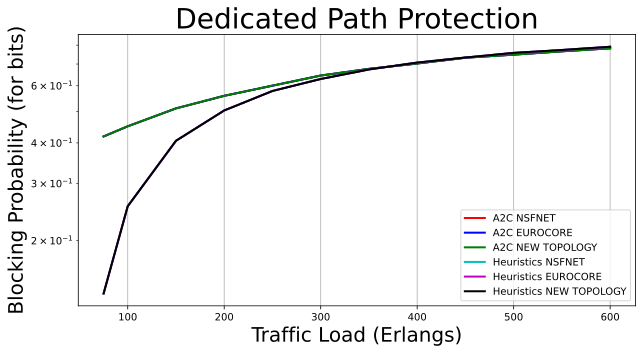

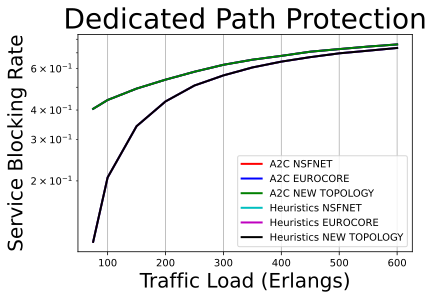

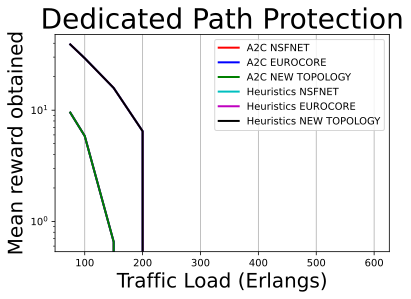

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Matrix = [7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

means_bit_rate_a2c_nsfnet = []
means_episode_a2c_nsfnet = []
means_reward_a2c_nsfnet = []

for i in Matrix: 
  df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/topologies_results/a2c-{}-nsfnet/testing.csv'.format(i),header=1)
  #df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-{}-nsfnet/testing.monitor.csv'.format(i),header=1)
  means_bit_rate_a2c_nsfnet.append(df.bit_rate_blocking_rate.mean())
  means_episode_a2c_nsfnet.append(df.episode_service_blocking_rate.mean())
  means_reward_a2c_nsfnet.append(df.r.mean())
  
print(means_bit_rate_a2c_nsfnet)
print(means_episode_a2c_nsfnet)

means_bit_rate_a2c_eurocore = []
means_episode_a2c_eurocore = []
means_reward_a2c_eurocore = []

for i in Matrix: 
  df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/topologies_results/a2c-{}-eurocore/testing.csv'.format(i),header=1)
  #df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-{}-nsfnet/testing.monitor.csv'.format(i),header=1)
  means_bit_rate_a2c_eurocore.append(df_2.bit_rate_blocking_rate.mean())
  means_episode_a2c_eurocore.append(df_2.episode_service_blocking_rate.mean())
  means_reward_a2c_eurocore.append(df_2.r.mean())

print(means_bit_rate_a2c_eurocore)
print(means_episode_a2c_eurocore)

means_bit_rate_a2c_new_topology = []
means_episode_a2c_new_topology = []
means_reward_a2c_new_topology = []

for i in Matrix: 
  df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/topologies_results/a2c-{}-new_topology/testing.csv'.format(i),header=1)
  #df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-{}-nsfnet/testing.monitor.csv'.format(i),header=1)
  means_bit_rate_a2c_new_topology.append(df_3.bit_rate_blocking_rate.mean())
  means_episode_a2c_new_topology.append(df_3.episode_service_blocking_rate.mean())
  means_reward_a2c_new_topology.append(df_3.r.mean())

print(means_bit_rate_a2c_new_topology)
print(means_episode_a2c_new_topology)



means_bit_rate_heuristics_nsfnet = []
means_episode_heuristics_nsfnet = []
means_reward_heuristics_nsfnet = []

for i in Matrix:
  df_4 = pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/topologies_results/heuristics-{}-nsfnet/sap_ff.monitor.csv'.format(i),header=1)
  means_bit_rate_heuristics_nsfnet.append(df_4.bit_rate_blocking_rate.mean())
  means_episode_heuristics_nsfnet.append(df_4.episode_service_blocking_rate.mean())  
  means_reward_heuristics_nsfnet.append(df_4.r.mean())


means_bit_rate_heuristics_eurocore = []
means_episode_heuristics_eurocore = []
means_reward_heuristics_eurocore = []

for i in Matrix:
  df_5 = pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/topologies_results/heuristics-{}-eurocore/sap_ff.monitor.csv'.format(i),header=1)
  means_bit_rate_heuristics_eurocore.append(df_5.bit_rate_blocking_rate.mean())
  means_episode_heuristics_eurocore.append(df_5.episode_service_blocking_rate.mean())  
  means_reward_heuristics_eurocore.append(df_5.r.mean())


means_bit_rate_heuristics_new_topology = []
means_episode_heuristics_new_topology = []
means_reward_heuristics_new_topology = []

for i in Matrix:
  df_6 = pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/topologies_results/heuristics-{}-new_topology/sap_ff.monitor.csv'.format(i),header=1)
  means_bit_rate_heuristics_new_topology.append(df_6.bit_rate_blocking_rate.mean())
  means_episode_heuristics_new_topology.append(df_6.episode_service_blocking_rate.mean())  
  means_reward_heuristics_new_topology.append(df_6.r.mean())




Loads = []
for i in Matrix:
  Loads.append(i*10)


plt.figure(figsize=(10,5), dpi = 300)


y_10 = means_bit_rate_a2c_nsfnet

y_20 = means_bit_rate_a2c_eurocore

y_30 = means_bit_rate_a2c_new_topology

y_40 = means_bit_rate_heuristics_nsfnet

y_50 = means_bit_rate_heuristics_eurocore

y_60 = means_bit_rate_heuristics_new_topology


plt.plot(Loads,y_10,'r', linewidth = 2)
plt.plot(Loads, y_20, 'b', linewidth = 2)
plt.plot(Loads, y_30, 'g', linewidth = 2)
plt.plot(Loads,y_40, 'c', linewidth = 2)
plt.plot(Loads,y_50, 'm', linewidth = 2)
plt.plot(Loads,y_60, 'k', linewidth = 2)

plt.yscale("log")
plt.grid(axis='y', which = 'both')
plt.grid(axis='both', which='both')
plt.title(("Dedicated Path Protection"), fontsize = 28)

plt.xlabel(("Traffic Load (Erlangs)"), fontsize = 20)
plt.ylabel(("Blocking Probability (for bits)"), fontsize = 20)

plt.gca().legend(('A2C NSFNET', 'A2C EUROCORE', 'A2C NEW TOPOLOGY', 'Heuristics NSFNET', 'Heuristics EUROCORE', 'Heuristics NEW TOPOLOGY'))
images_dir = '/content/drive/MyDrive/optical-rl-gym-Modif/tmp/Results/'
plt.savefig(f"{images_dir}comparisonheuristics_BBR.png")
plt.show()


y_11 = means_episode_a2c_nsfnet

y_21 = means_episode_a2c_eurocore

y_31 = means_episode_a2c_new_topology

y_41 = means_episode_heuristics_nsfnet

y_51 = means_episode_heuristics_eurocore

y_61 = means_episode_heuristics_new_topology

plt.plot(Loads,y_11,'r', linewidth = 2)
plt.plot(Loads, y_21, 'b', linewidth = 2)
plt.plot(Loads, y_31, 'g', linewidth = 2)
plt.plot(Loads,y_41, 'c', linewidth = 2)
plt.plot(Loads, y_51, 'm', linewidth = 2)
plt.plot(Loads, y_61, 'k', linewidth = 2)

plt.yscale("log")
plt.grid(axis='y', which = 'both')
plt.grid(axis='both', which='both')
plt.title(("Dedicated Path Protection"), fontsize = 28)

plt.xlabel(("Traffic Load (Erlangs)"), fontsize = 20)
plt.ylabel(("Service Blocking Rate"), fontsize = 20)

plt.gca().legend(('A2C NSFNET', 'A2C EUROCORE', 'A2C NEW TOPOLOGY', 'Heuristics NSFNET', 'Heuristics EUROCORE', 'Heuristics NEW TOPOLOGY'))
images_dir = '/content/drive/MyDrive/optical-rl-gym-Modif/tmp/Results/'
plt.savefig(f"{images_dir}comparisonheuristics_SBR.png")
plt.show()

y_12 = means_reward_a2c_nsfnet

y_22 = means_reward_a2c_eurocore

y_32 = means_reward_a2c_new_topology

y_42 = means_reward_heuristics_nsfnet

y_52 = means_reward_heuristics_eurocore

y_62 = means_reward_heuristics_new_topology

plt.plot(Loads,y_12,'r', linewidth = 2)
plt.plot(Loads, y_22, 'b', linewidth = 2)
plt.plot(Loads, y_32, 'g', linewidth = 2)
plt.plot(Loads,y_42, 'c', linewidth = 2)
plt.plot(Loads,y_52, 'm', linewidth = 2)
plt.plot(Loads,y_62, 'k', linewidth = 2)

plt.yscale("log")
plt.grid(axis='y', which = 'both')
plt.grid(axis='both', which='both')
plt.title(("Dedicated Path Protection"), fontsize = 28)

plt.xlabel(("Traffic Load (Erlangs)"), fontsize = 20)
plt.ylabel(("Mean reward obtained"), fontsize = 20)

plt.gca().legend(('A2C NSFNET', 'A2C EUROCORE', 'A2C NEW TOPOLOGY', 'Heuristics NSFNET', 'Heuristics EUROCORE', 'Heuristics NEW TOPOLOGY'))
images_dir = '/content/drive/MyDrive/optical-rl-gym-Modif/tmp/Results/'
plt.savefig(f"{images_dir}comparisonheuristics_R.png")
plt.show()

## Plotting the DQN testing results

Plotting the Episode Service Blocking Rate

In [ ]:
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-7.5-nsfnet/testing.monitor.csv',header=1)

x = df.t
y = df.episode_service_blocking_rate
plt.plot(x, y, 'b')

df_1 = pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-15-nsfnet/testing.monitor.csv',header=1)

x_1 = df_1.t
y_1 = df_1.episode_service_blocking_rate
plt.plot(x_1, y_1, 'g')

df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-30-nsfnet/testing.monitor.csv',header=1)

x_2 = df_2.t
y_2 = df_2.episode_service_blocking_rate
plt.plot(x_2, y_2, 'c')

df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-50-nsfnet/testing.monitor.csv',header=1)

x_3 = df_3.t
y_3 = df_3.episode_service_blocking_rate
plt.plot(x_3, y_3, 'r')

plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode service blocking rate") 
plt.title("Trained model with holding - DQN") 
# plt.axhline(y=0.05, color='tab:red', linestyle='-')
plt.gca().legend(('DQN-75','DQN-150', 'DQN-300', 'DQN-500'))
plt.show()

Plotting the reward for DQN Agent

In [ ]:
import matplotlib.pyplot as plt


df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-7.5-nsfnet/training.monitor.csv',header=1)

x = df.t
y = df.r
plt.plot(x, y, 'b')

df_1 = pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-15-nsfnet/training.monitor.csv',header=1)

x_1 = df_1.t
y_1 = df_1.r
plt.plot(x_1, y_1, 'g')

df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-30-nsfnet/training.monitor.csv',header=1)

x_2 = df_2.t
y_2 = df_2.r
plt.plot(x_2, y_2, 'c')

df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-dqn-1k/deeprmsa-dqn-50-nsfnet/training.monitor.csv',header=1)

x_3 = df_3.t
y_3 = df_3.r
plt.plot(x_3, y_3, 'r')


plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Reward") 
plt.title("Trained model with holding = 50 - DQN") 
plt.axhline(y=0.05, color='tab:red', linestyle='-')
plt.gca().legend(('DQN-75','DQN-150', 'DQN-300', 'DQN-500'))
plt.show()

Plotting the A2C results for episode service blocking rate

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-7.5-nsfnet/testing.monitor.csv',header=1)
x = df.t
y = df.episode_service_blocking_rate
plt.plot(x, y, 'b')

df_1=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-15-nsfnet/testing.monitor.csv',header=1)
x_1 = df_1.t
y_1 = df_1.episode_service_blocking_rate
plt.plot(x_1, y_1, 'g')

df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-30-nsfnet/testing.monitor.csv',header=1)
x_2 = df_2.t
y_2 = df_2.episode_service_blocking_rate
plt.plot(x_2, y_2, 'r')

df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-50-nsfnet/testing.monitor.csv',header=1)
x_3 = df_3.t
y_3 = df_3.episode_service_blocking_rate
plt.plot(x_3, y_3, 'c')


plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode service blocking rate") 
plt.title("Service blocking rate - A2C") 
plt.axhline(y=0.05, color='k', linestyle='-')
plt.gca().legend(( 'A2C-75','A2C-150','A2C-300','A2C-500'), )
plt.show()

Plotting the A2C reward results

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-7.5-nsfnet/training.monitor.csv',header=1)
x = df.t
y = df.r
plt.plot(x, y, 'b')

df_1=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-15-nsfnet/training.monitor.csv',header=1)
x_1 = df_1.t
y_1 = df_1.r
plt.plot(x_1, y_1, 'g')

df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-30-nsfnet/training.monitor.csv',header=1)
x_2 = df_2.t
y_2 = df_2.r
plt.plot(x_2, y_2, 'r')

df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-a2c-50/deeprmsa-a2c-50-50-nsfnet/training.monitor.csv',header=1)
x_3 = df_3.t
y_3 = df_3.r
plt.plot(x_3, y_3, 'c')


plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode reward ") 
plt.title("Reward - A2C") 
plt.axhline(y=0.05, color='tab:red', linestyle='-')
plt.gca().legend(( 'A2C-75', 'A2C-150','A2C-300','A2C-500'))
plt.show()



Plotting the PPO2 results for episode service blocking rate

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo2-25/deeprmsa-ppo2-7.5-nsfnet/testing.monitor.csv',header=1)
x = df.t
y = df.episode_service_blocking_rate
plt.plot(x, y, 'c')


df_1=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo2-25/deeprmsa-ppo2-15-nsfnet/testing.monitor.csv',header=1)
x_1 = df_1.t
y_1 = df_1.episode_service_blocking_rate
plt.plot(x, y, 'b')

df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo2-25/deeprmsa-ppo2-30-nsfnet/testing.monitor.csv',header=1)
x_2 = df_2.t
y_2 = df_2.episode_service_blocking_rate
plt.plot(x_2, y_2, 'g')

df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo2-25/deeprmsa-ppo2-40-nsfnet/testing.monitor.csv',header=1)
x_3 = df_3.t
y_3 = df_3.episode_service_blocking_rate
plt.plot(x_3, y_3, 'r')


plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode service blocking rate") 
plt.title("Service blocking rate - PPO2") 
plt.axhline(y=0.05, color='k', linestyle='-')
plt.gca().legend(( 'PPO2-75','PPO2-150','PPO2-300','PPO2-400'))

plt.show()


Plotting the PPO2 results for reward on different Erlang

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

df_3=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo2-25/deeprmsa-ppo2-7.5-nsfnet/training.monitor.csv',header=1)
x_3 = df_3.t
y_3 = df_3.r
plt.plot(x_3, y_3, 'c')


df=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo2-25/deeprmsa-ppo2-15-nsfnet/training.monitor.csv',header=1)
x = df.t
y = df.r
plt.plot(x, y, 'b')

df_1=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo2-25/deeprmsa-ppo2-30-nsfnet/training.monitor.csv',header=1)
x_1 = df_1.t
y_1 = df_1.r
plt.plot(x_1, y_1, 'g')

df_2=pd.read_csv('/content/drive/MyDrive/optical-rl-gym-Modif/tmp/deeprmsa-ppo2-25/deeprmsa-ppo2-40-nsfnet/training.monitor.csv',header=1)
x_2 = df_2.t
y_2 = df_2.r
plt.plot(x_2, y_2, 'r')


plt.xlabel("Number of request simulated" + '$(x10^3)$') 
plt.ylabel("Episode reward") 
plt.title("Reward - PPO2") 
plt.axhline(y=0.05, color='tab:red', linestyle='-')
plt.gca().legend(( 'PPO2-75','PPO2-150','PPO2-300','PPO2-400'))
plt.show()
